In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/home/bedawati/Downloads/ML_Intern/LinearRegression/Salary_edited_data.csv")

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [5]:
X = df[['Job Title', 'Years of Experience']]
y = df['Salary']

In [6]:
from sklearn import linear_model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   int64  
 1   Gender               6699 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6699 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6699 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 314.1+ KB


In [8]:
import seaborn as sns

In [9]:
import numpy as np

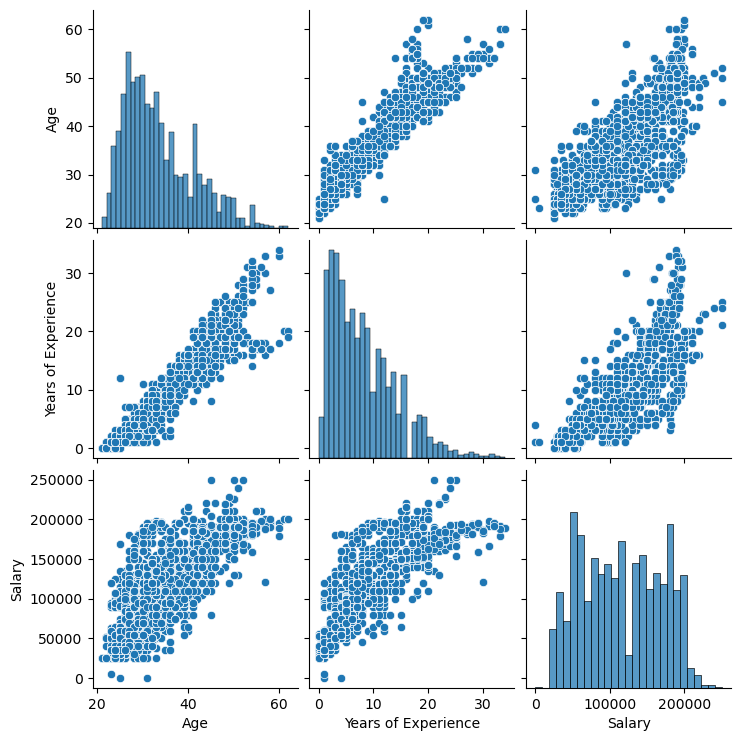

In [10]:
sns.pairplot(df)

/tmp/ipykernel_8000/2215294905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr())
/tmp/ipykernel_8000/2215294905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)


<Axes: >

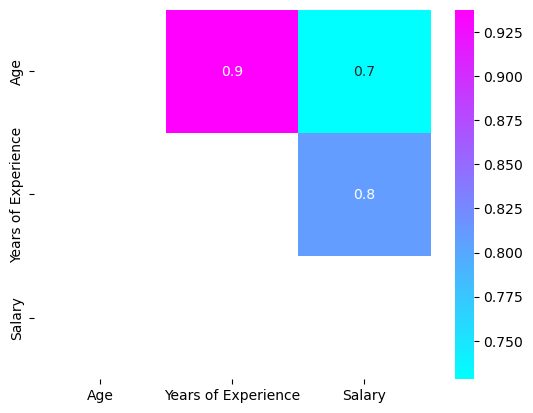

In [11]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Job Title'])  # drop='first' avoids dummy variable trap
    ],
    remainder='passthrough'  # Keep other columns (like 'Experience') as-is
)

X_encoded = column_transformer.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5359, 192) (5359,) (1340, 192) (1340,)


In [18]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.metrics import mean_squared_error

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
model.intercept_

49837.314749882746

In [20]:
# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

In [24]:
# print("Predictions:", y_pred)
# print("Actual:", list(y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 451805332.3759474


In [26]:

# Optional: Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 49837.314749882746
Coefficients: [-16010.21241511 -47476.50146487  19973.01504959 -11916.66207515
  -2211.29467803      0.              0.          85440.66523942
  73002.41775139  17668.84559624 -20407.41609852  -4033.21473864
 -32190.71073526      0.         -28120.79819117 -20407.41609852
 -15099.25238481  49898.94556895 -14795.59904137  57268.43700969
 -21800.97206179      0.         -15706.55907168   4991.3438069
  -5950.33485992  44189.96890349  19471.07039555  64914.85748694
  26943.21985412  14162.90668184   9755.43566932  18863.76370868
  21201.14088556  23370.76415353  15239.36631013  13859.25333841
  24475.58076582      0.         -42326.60534681  -7823.11173518
  14837.44759371  37487.71278905   7344.10658085  12987.84945062
  28872.67918512 -10444.78718991 -38064.98350452 -19241.94758381
      0.         -15761.3190963   24171.92742239   7598.13579384
      0.         -10398.39535797 -26930.19318597 -18337.82139613
 -20542.65517359 -20711.06944195 -15305.0286547

In [31]:
# Get encoded feature names from ColumnTransformer
feature_names = column_transformer.get_feature_names_out()

# Create the coefficient DataFrame
coeff_df = pd.DataFrame(model.coef_.reshape(-1, 1), index=feature_names, columns=['Coefficient'])

# Display the DataFrame
print(coeff_df)


                                                  Coefficient
encoder__Job Title_Accountant                   -16010.212415
encoder__Job Title_Administrative Assistant     -47476.501465
encoder__Job Title_Back end Developer            19973.015050
encoder__Job Title_Business Analyst             -11916.662075
encoder__Job Title_Business Development Manager  -2211.294678
...                                                       ...
encoder__Job Title_UX Researcher                  4615.135753
encoder__Job Title_VP of Finance                 49498.132617
encoder__Job Title_VP of Operations              39489.111877
encoder__Job Title_Web Developer                 -6722.316906
remainder__Years of Experience                    5295.894372

[192 rows x 1 columns]


In [29]:
# Y_pred = mlr.predict(X_test)

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 15714.299508345466
Mean Squared Error: 451805332.3759474
Root Mean Squared Error: 21255.712935019314
R Squared Score is: 0.8388078416860967


In [41]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

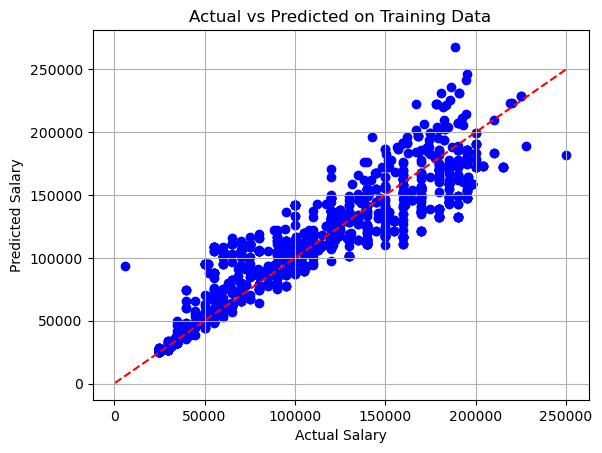

In [53]:


# X_train and y_train = training data
# mlr = trained model

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # reference line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted on Training Data")
plt.grid(True)
plt.show()

In [52]:

# y_pred_test = model.predict()

In [54]:
# y2_pred = mlr.predict(X_test)

In [56]:
# plt.subplot(1, 2, 2)
# plt.scatter(y_test, y2_pred, color='green', alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual CO2 (Test)")
# plt.ylabel("Predicted CO2 (Test)")
# plt.title("Testing Data: Actual vs Predicted")
# plt.grid(True)

In [57]:
y_test, y_pred

(1267    200000
 5730     70000
 1785     65000
 420     155000
 4688     50000
          ...  
 6129     75000
 4979    170000
 4713     55000
 3073    147326
 2549    182237
 Name: Salary, Length: 1340, dtype: int64,
 array([177915.92374572,  67411.03843918,  73416.95294428, ...,
         66773.42832181, 147556.62076956, 204395.39560516]))